---
---
# **Historical Automobile Sales**
---
---

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [3]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

## **1. Line chart - automobile sales fluctuate from year to year**

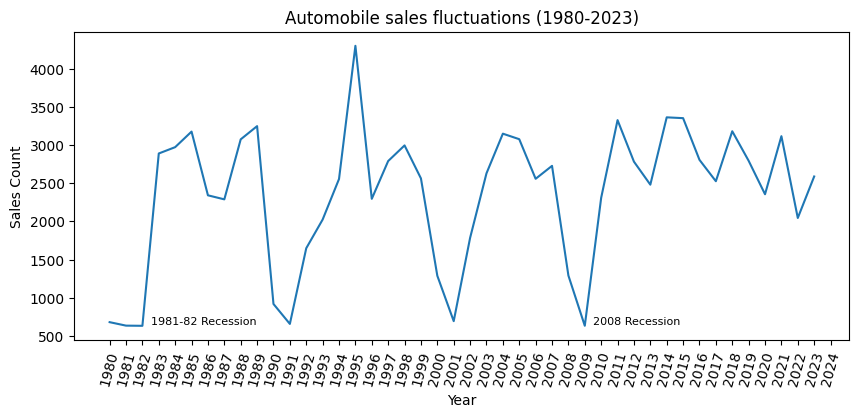

In [23]:
sub_df = df.groupby("Year")["Automobile_Sales"].mean()

plt.figure(figsize=(10,4))
sub_df.plot()

plt.xticks(list(range(1980,2025)), rotation=75)
plt.xlabel("Year")
plt.ylabel("Sales Count")
plt.title("Automobile sales fluctuations (1980-2023)")

plt.text(1982.5, 650, "1981-82 Recession", fontdict={"fontsize":8})
plt.text(2009.5, 650, "2008 Recession", fontdict={"fontsize":8})

plt.show()

## **Is there a noticeable difference in sales trends between different vehicle types during recession preiods?**

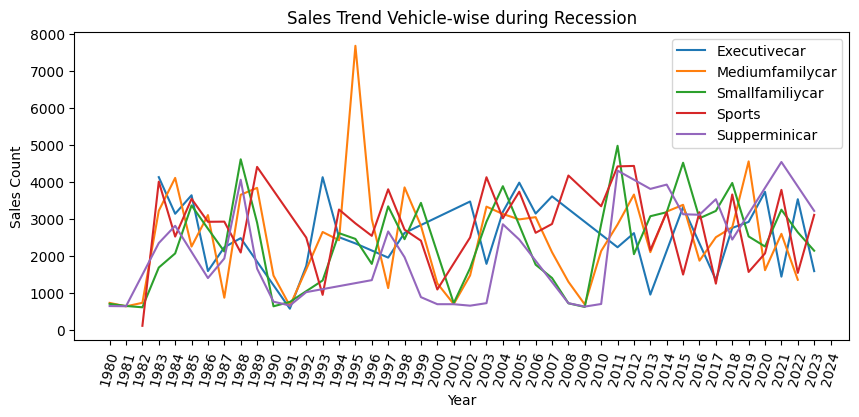

In [29]:
sub_df = df.groupby(["Year", "Vehicle_Type"], as_index=False)["Automobile_Sales"].mean()
sub_df.set_index("Year", inplace=True)

sub_df = sub_df.groupby(["Vehicle_Type"])["Automobile_Sales"]

plt.figure(figsize=(10,4))
sub_df.plot()

plt.title("Sales Trend Vehicle-wise during Recession")
plt.xlabel("Year")
plt.ylabel("Sales Count")
plt.xticks(list(range(1980,2025)), rotation=75)
plt.legend()

## **Sales trend per vehicle type for a recession period compare with a non-recession period**

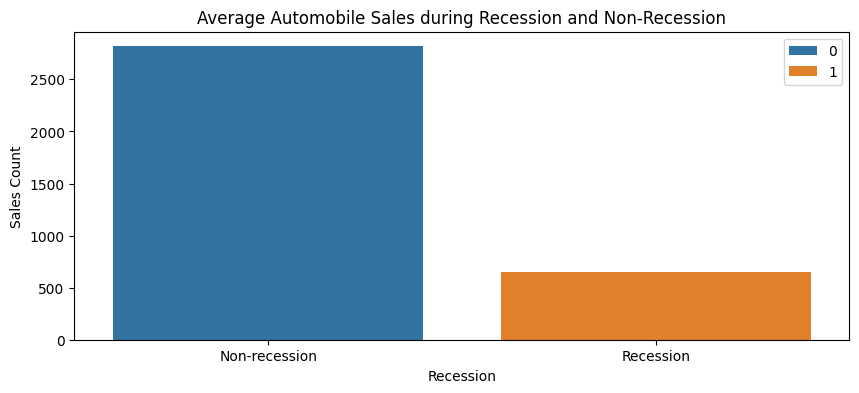

In [36]:
sub_df = df.groupby("Recession")["Automobile_Sales"].mean().reset_index()

plt.figure(figsize=(10,4))

sns.barplot(x="Recession", y="Automobile_Sales", data=sub_df, hue="Recession")
plt.xlabel("Recession")
plt.ylabel("Sales Count")
plt.title("Average Automobile Sales during Recession and Non-Recession")
plt.xticks(ticks=[0,1], labels=["Non-recession","Recession"])
plt.legend()
plt.show()

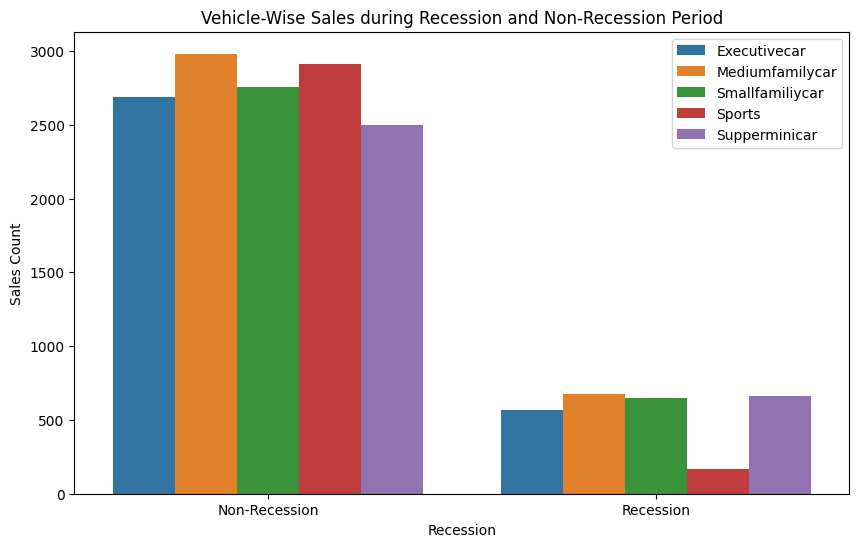

In [44]:
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession')
plt.ylabel('Sales Count')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.legend()
plt.show()

## **Variations in GDP during recession and non-recession**

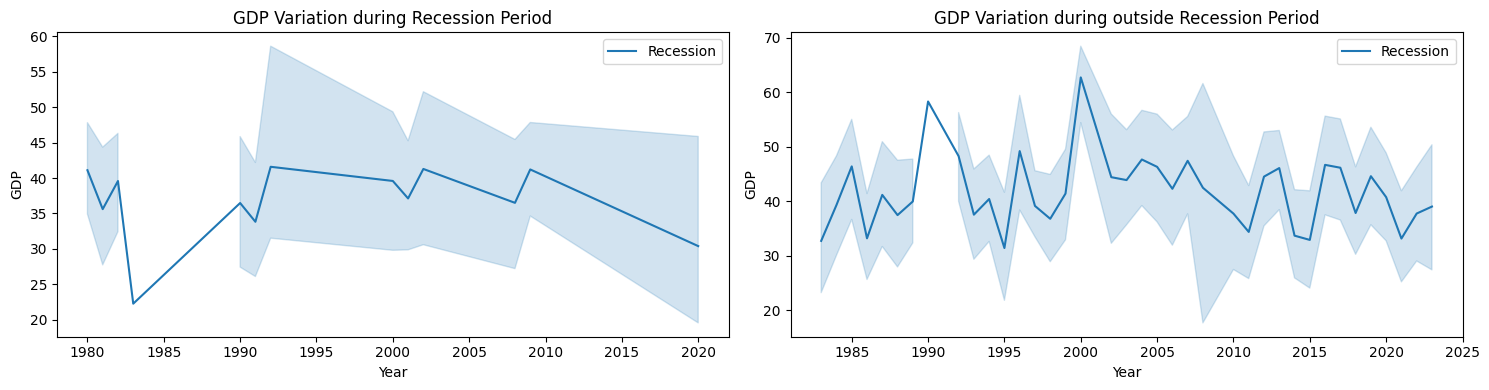

In [10]:
rec_data = df[df["Recession"]==1]
non_rec_data = df[df["Recession"]==0]

fig = plt.figure(figsize=(15,4))

ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

sns.lineplot(x="Year", y="GDP", data=rec_data, label="Recession", ax=ax0)
ax0.set_title("GDP Variation during Recession Period")

sns.lineplot(x="Year", y="GDP", data=non_rec_data, label="Recession", ax=ax1)
ax1.set_title("GDP Variation during outside Recession Period")

plt.tight_layout()
plt.show()

## **Impact of seasonality on Automobile Sales**

Text(0.5, 1.0, 'Seasonality immpact on Automobile Sales')

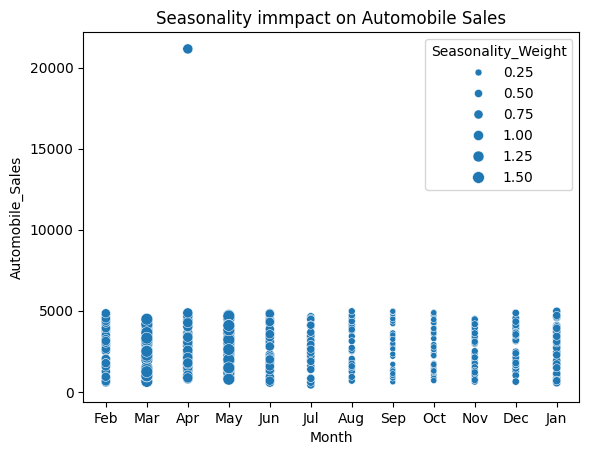

In [12]:
non_rec_data = df[df["Recession"]==0]

size=non_rec_data["Seasonality_Weight"]

sns.scatterplot(data=non_rec_data, x="Month", y="Automobile_Sales", size=size)

plt.title("Seasonality immpact on Automobile Sales")

## **Correlation between average vehicle price related to the sales volume during recessions**

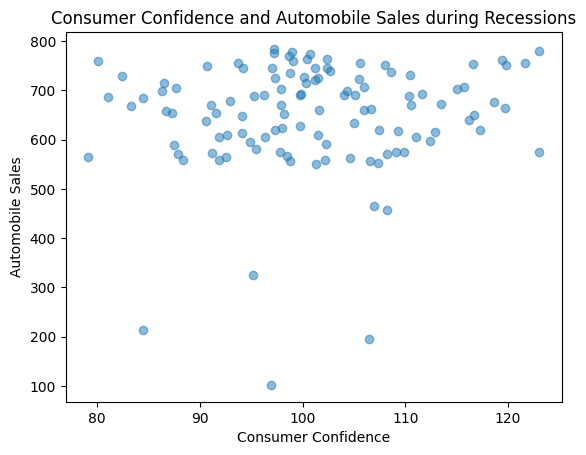

In [15]:
rec_data = df[df["Recession"]==1]

plt.scatter(rec_data["Consumer_Confidence"], rec_data["Automobile_Sales"], alpha=0.5)

plt.xlabel("Consumer Confidence")
plt.ylabel("Automobile Sales")
plt.title("Consumer Confidence and Automobile Sales during Recessions")


plt.show()

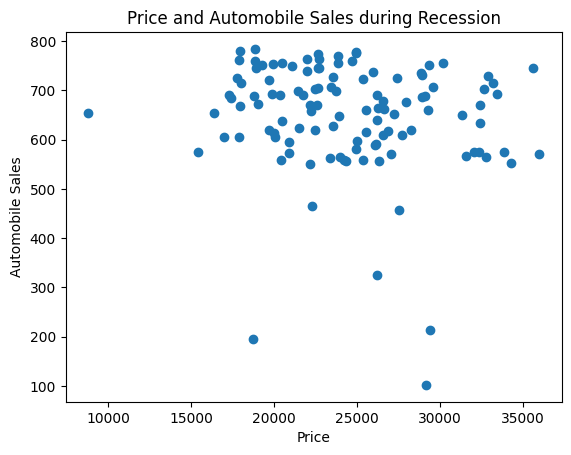

In [18]:
plt.scatter(rec_data["Price"], rec_data["Automobile_Sales"])

plt.xlabel("Price")
plt.ylabel("Automobile Sales")
plt.title("Price and Automobile Sales during Recession")
plt.show()

## **Adversiting expenditure of XYZAAutomotives during recession and non-recession periods**

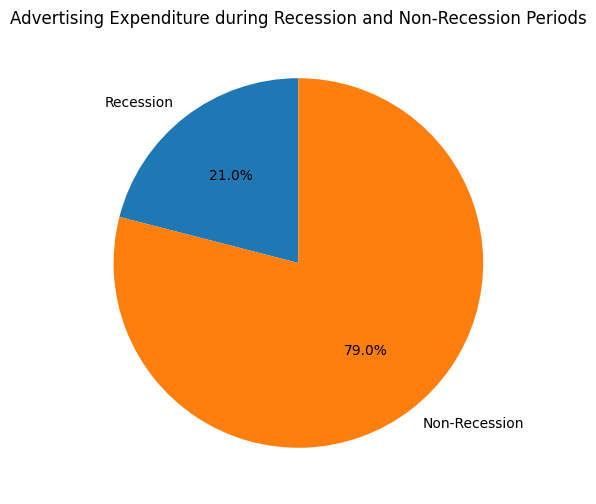

In [19]:
import matplotlib.pyplot as plt

# Filtrar los datos para los períodos de recesión y no recesión
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calcular el gasto total en publicidad para ambos períodos
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Crear un gráfico de pastel para el gasto en publicidad
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Configuración del título
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

# Mostrar el gráfico
plt.show()

## **Total Advertisement expenditure for each vehicle type during recession period**

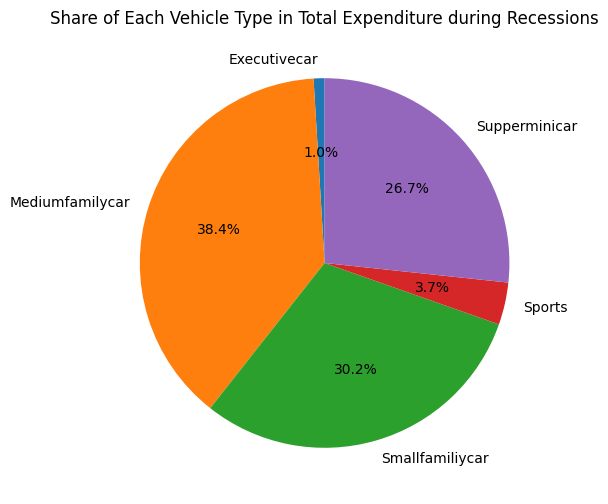

In [20]:
# Filtrar los datos para el período de recesión
Rdata = df[df['Recession'] == 1]

# Calcular el gasto en publicidad por tipo de vehículo durante las recesiones
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Crear un gráfico de pastel para la proporción del gasto de cada tipo de vehículo durante las recesiones
plt.figure(figsize=(10, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Configuración del título
plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')

# Mostrar el gráfico
plt.show()

## **Effect of the unemployment rate on vehicle type and sales during the Recession Period**

C:\Users\AlxMa\AppData\Local\Temp\ipykernel_18980\272440978.py:5: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


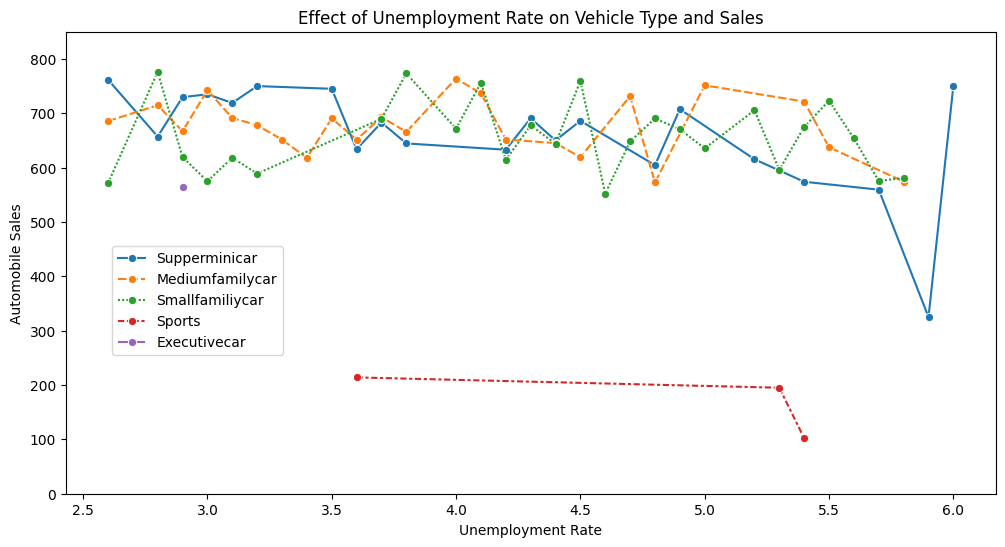

In [24]:
# Filtrar los datos para el período de recesión
df_rec = df[df['Recession'] == 1]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)

# Configuración de límites, leyenda y título
plt.ylim(0, 850)
plt.legend(loc=(0.05, .3))
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')

# Mostrar el gráfico
plt.show()

## **Map of the hightest sales region/offices of the company during recession period**

In [31]:
import requests
import pandas as pd
import folium

# Descargar el archivo us-states.json usando requests
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
response = requests.get(url)

if response.status_code == 200:
    with open("us-states.json", "wb") as f:
        f.write(response.content)
else:
    print("Failed to download the JSON file")

# Cargar el archivo JSON
filename = "us-states.json"

In [32]:
# Filtrar los datos para el período de recesión
recession_data = df[df['Recession'] == 1]

# Calcular las ventas totales por ciudad
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Crear un mapa base centrado en los Estados Unidos
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Crear una capa coroplética usando Folium
choropleth = folium.Choropleth(
    geo_data=filename,  # Archivo GeoJSON con los límites de los estados
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

# Añadir tooltips a la capa coroplética
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Mostrar el mapa
map1